In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pickle
from timeit import time
from shape import Shape, Block
from shape_boat import ShapeBoat, ShapeBoat_spline
from shapeshift_trajectory import shapeshift_trajectory, write_results, experiments, print_results_tables


## 1. Composing Shapes from Blocks

In [29]:
s = .90625

shape_1a = Shape([Block(0,0,scale=s)])
shape_1b = Shape([Block(0,0,90,scale=s)])
shape_2a = Shape([Block(-.5,0,scale=s),    Block(.5,0,scale=s)])
shape_2b = Shape([Block(0,0.25,scale=s),   Block(0,-0.25,scale=s)])
shape_2c = Shape([Block(-.25,0,90,scale=s),Block(0.25,0,90,scale=s)])
shape_2d = Shape([Block(0,-.5,90,scale=s) ,Block(0,.5,90,scale=s)])
shape_2e = Shape([Block(0,-0.5,90,scale=s),Block(0.25,0.25,0,scale=s)])
shape_2f = Shape([Block(-0.25,0.25,90,scale=s),Block(0.25,-0.25,90,scale=s)])
shape_3a = Shape([Block(-.5,0,scale=s),    Block(.5,0,scale=s),   Block(-1.25,0.25,90,scale=s)])
shape_3b = Shape([Block(-.5,0,scale=s),    Block(.5,0,0,scale=s), Block(-.5,0.5,scale=s)])
shape_3c = Shape([Block(0,0,scale=s),      Block(-1,0,scale=s),   Block(1,0,scale=s)])
shape_4a = Shape([Block(-.5,0,scale=s),    Block(.5,0,scale=s),   Block(-1.25,0.25,90,scale=s),Block(1.25,0.25,90,scale=s)])
shape_4b = Shape([Block(-.5,-.25,scale=s), Block(-.5,.25,scale=s),Block(.5,-.25,scale=s),      Block(.5,.25,scale=s)])
shape_6a = Shape([Block(0,0,scale=s),      Block(1.,0,scale=s),   Block(0,0.5,scale=s),        Block(-1.,0.5,scale=s),Block(1.,0.5,scale=s),Block(1.,-.5,scale=s)])

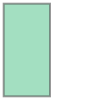

In [30]:
moving_shape=shape_2f
obstacle_shape=shape_1b

moving_shape.plot(union=False)
obstacle_shape.plot(union=False)
from shapely import ops, geometry
obstacle_shape.polygon.simplify(0.2, preserve_topology=False)


### Partitioning of convex hulls around shape

In [4]:
msums, hulls = obstacle_shape.c_space_rotate(moving_shape)
#plot_hulls(hulls, text=False)

### C-Space of a given obstacle b

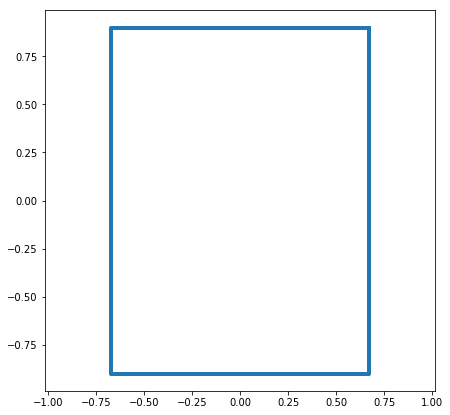

In [5]:
moving_shape.plot_polygons([msums.values()[3]])

### Finding Convex Hull of C-Space

In [6]:
moving_shape.plot_polygons(hulls.values()[3])

## 2. Trajectory Planning

In [31]:
tests = {'1_step1':         (shape_1b, shape_2c, (s*-0.75, s*0.,     0.),  (s*-0.25,    s*1.0,    0.)),  \
         '1_step2':        (shape_2d, shape_1b, (s*-0.75, s*0.5,     0.),  (s*0.0,    s*1.5,    0.)),  \
         '2_step1':         (shape_1b, shape_2c, (s*-.75, s*0.0,     0.),  (s*0.,    s*.75,   90.)), \
         '2_step2':        (shape_2e, shape_1b, (s*-0.5, s*0.5,     0.),  (s*-1.0,    s*-0.25,    270.)),  \
         '3_step1':        (shape_1b, shape_2c, (s*-0.75, s*0.,     0.),  (s*-0.75,    s*0.5,    0.)),  \
         '3_step2':        (shape_2f, shape_1b, (s*-0.75, s*0.25,     0.),  (s*0.25,    s*0.75,    0)),  \
        }

### MIQP - b-splines

SETTING ENDPOINTS
Calculated C-Space: 0.304948 seconds
Set up graph: 0.160719 seconds
finding_vertex POINT (-0.6796875 0.2265625) 0.0
finding_vertex POINT (0.2265625 0.6796875) 0.0
found path endpoint hulls 27 28


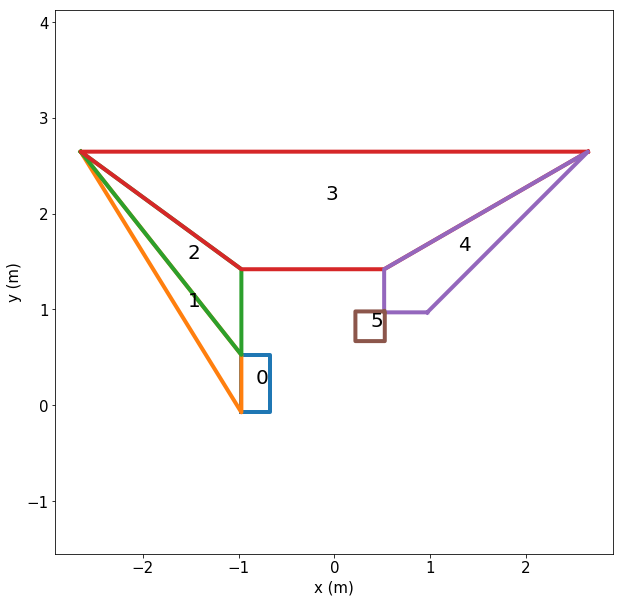

INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 182
0.004951 seconds
ADDING COSTS
Number of costs 13
0.010496 seconds
ADDING CONSTRAINTS
None
Number of constraints 1108
0.168721 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.478578 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.249077 seconds
Set up graph: 0.338701 seconds
finding_vertex POINT (-0.6796875 0.2265625) 0.0
finding_vertex POINT (0.2265625 0.6796875) 0.0
found path endpoint hulls 27 28


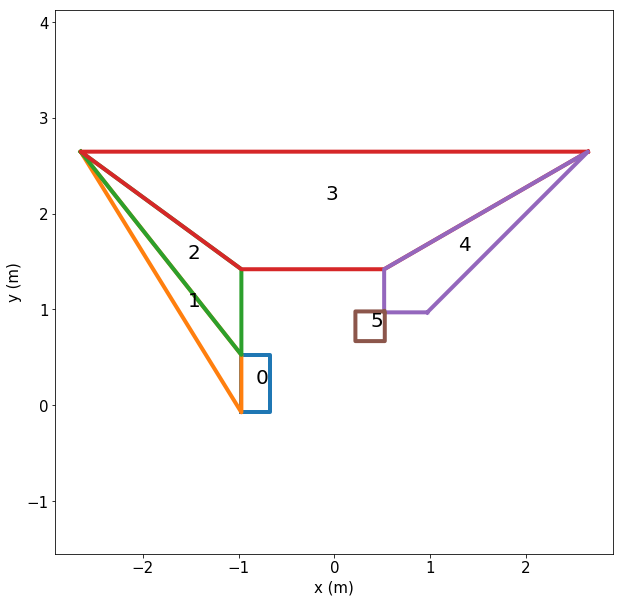

INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 116
0.004214 seconds
ADDING COSTS
Number of costs 12
0.019288 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 54
0.055095 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.033258 seconds

Time Scaling target: 1.000000, result: 1.000000
Time Scaling target: 5.542305, result: 5.600000


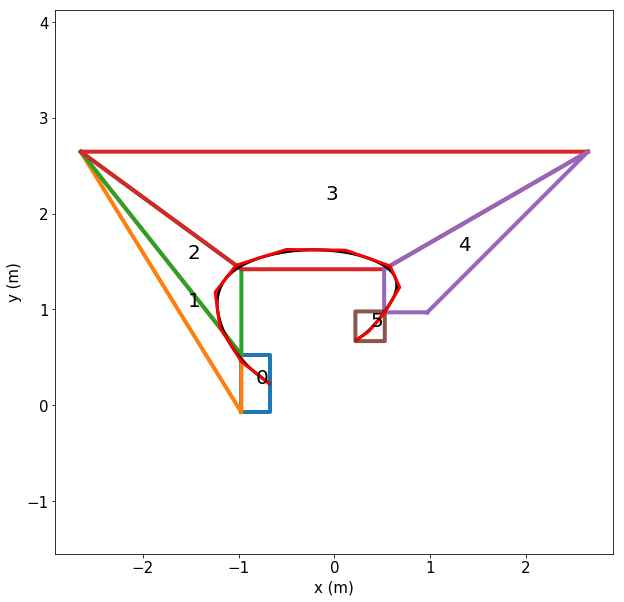

{'S': array([[-6.79687500e-01,  2.26562500e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.79872648e-01,  2.26708538e-01,  0.00000000e+00,
        -1.85148278e-03,  1.46038085e-03,  0.00000000e+00],
       [-6.80428093e-01,  2.27146652e-01,  0.00000000e+00,
        -3.70296556e-03,  2.92076170e-03,  0.00000000e+00],
       ...,
       [ 2.26908710e-01,  6.79925853e-01,  0.00000000e+00,
        -1.73104838e-03, -1.19176333e-03,  0.00000000e+00],
       [ 2.26649052e-01,  6.79747088e-01,  0.00000000e+00,
        -8.65524192e-04, -5.95881666e-04,  0.00000000e+00],
       [ 2.26562500e-01,  6.79687500e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]]), 'U': array([[-0.00925741,  0.0073019 ,  0.        ],
       [-0.00925741,  0.0073019 ,  0.        ],
       [-0.00925741,  0.0073019 ,  0.        ],
       ...,
       [ 0.00432762,  0.00297941,  0.        ],
       [ 0.00432762,  0.00297941,  0.        ],
       [ 

In [32]:
test = '3_step2'

x = time.time()
experiment = shapeshift_trajectory(*tests[test], N=11, boat_type=ShapeBoat_spline, boat_type_init=ShapeBoat_spline)
#print experiment['S'].shape, experiment['U'].shape
np.savetxt("shapeshifting_test.txt", np.hstack((experiment['S'][0,:,:],experiment['U'][0,:,:])), delimiter=",")
data = {'S':experiment['S'][0],
        'U':experiment['U'][0]}
with open(test + '.pkl', 'wb') as f:
    pickle.dump(data, f, protocol=pickle.HIGHEST_PROTOCOL)

### Show polytope graph from plan

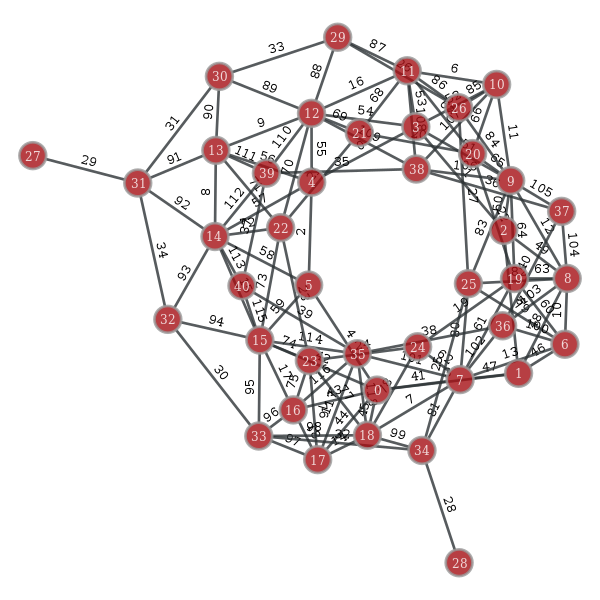

In [33]:
experiment['boat'].g.draw_graph()

## 3. Running Experiments

SETTING ENDPOINTS
Calculated C-Space: 0.192541 seconds
Set up graph: 0.122506 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (-0.2265625 0.90625) 0.0
found path endpoint hulls 23 26


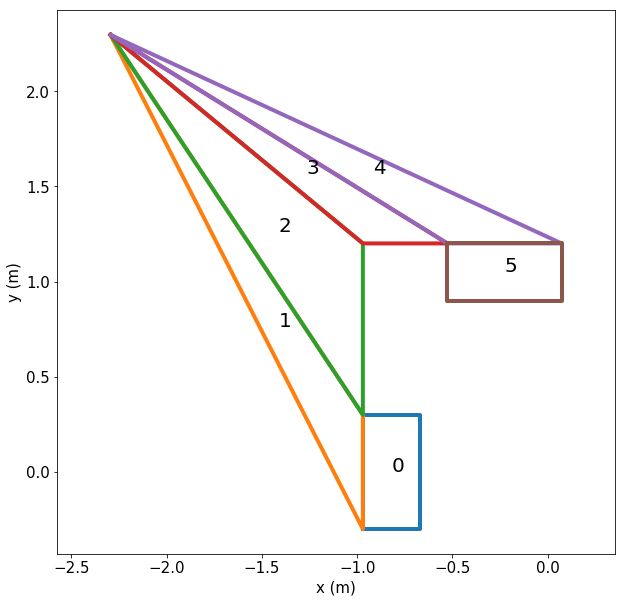

INITIALIZED ShapeBoat 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.003551 seconds
ADDING COSTS
Number of costs 2
0.001550 seconds
ADDING CONSTRAINTS
None
Number of constraints 490
0.098393 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.305955 seconds



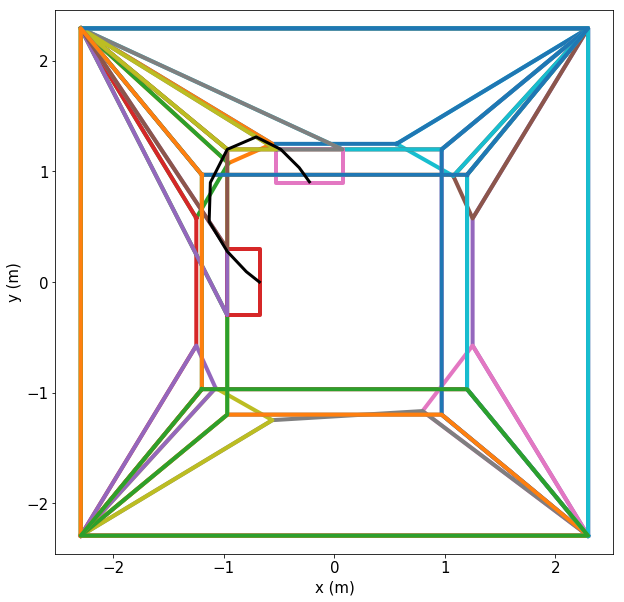

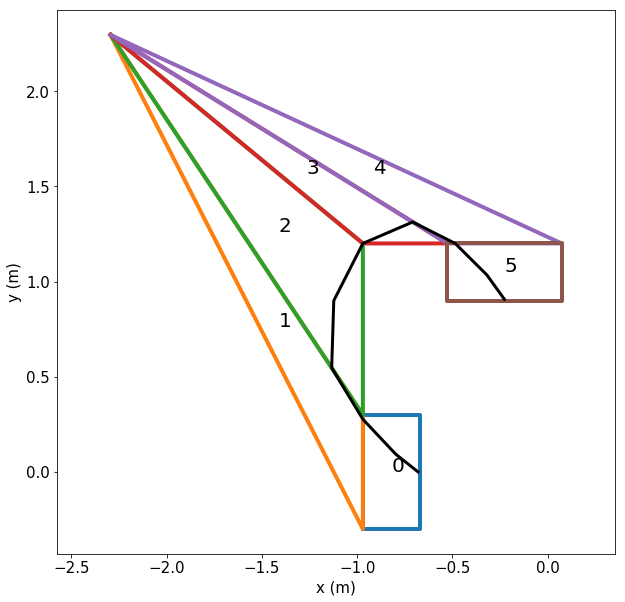

SETTING ENDPOINTS
Calculated C-Space: 0.224803 seconds
Set up graph: 0.139951 seconds
finding_vertex POINT (-0.6796875 0.453125) 0.0
finding_vertex POINT (0 1.359375) 0.0
found path endpoint hulls 26 29


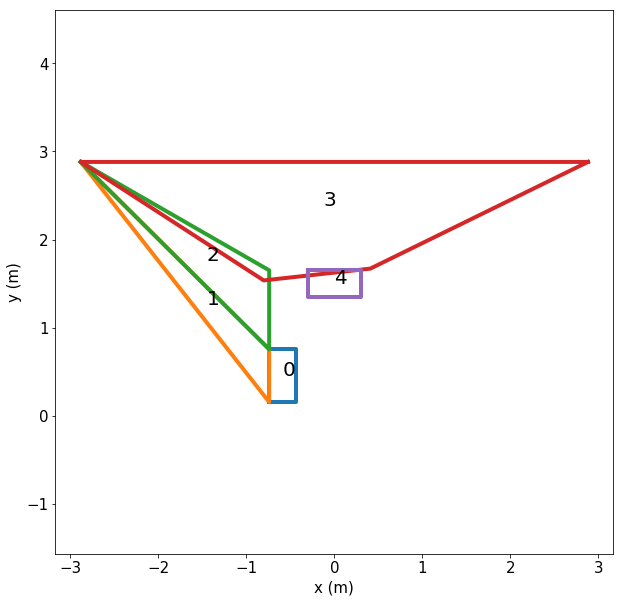

INITIALIZED ShapeBoat 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 156
0.001785 seconds
ADDING COSTS
Number of costs 2
0.001184 seconds
ADDING CONSTRAINTS
None
Number of constraints 432
0.048236 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.288905 seconds



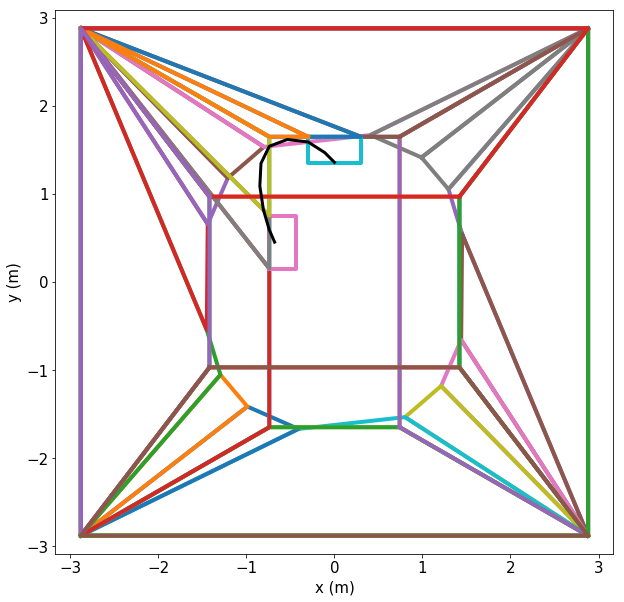

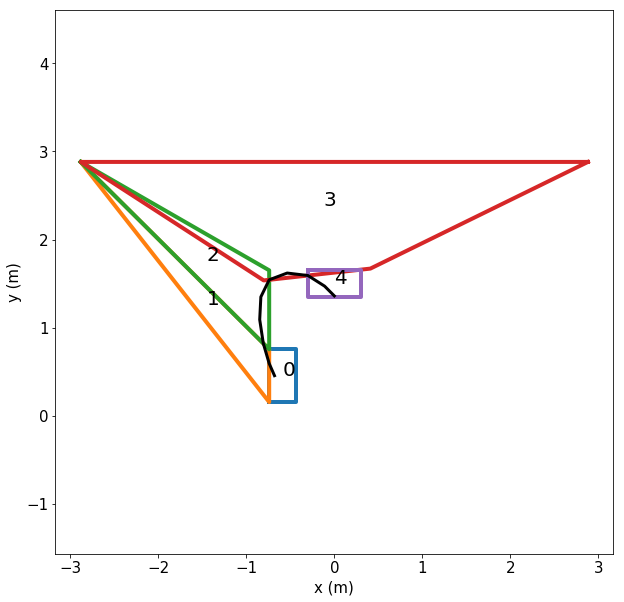

SETTING ENDPOINTS
Calculated C-Space: 0.198176 seconds
Set up graph: 0.286016 seconds
finding_vertex POINT (-0.6796875 0.2265625) 0.0
finding_vertex POINT (0.2265625 0.6796875) 0.0
found path endpoint hulls 27 28


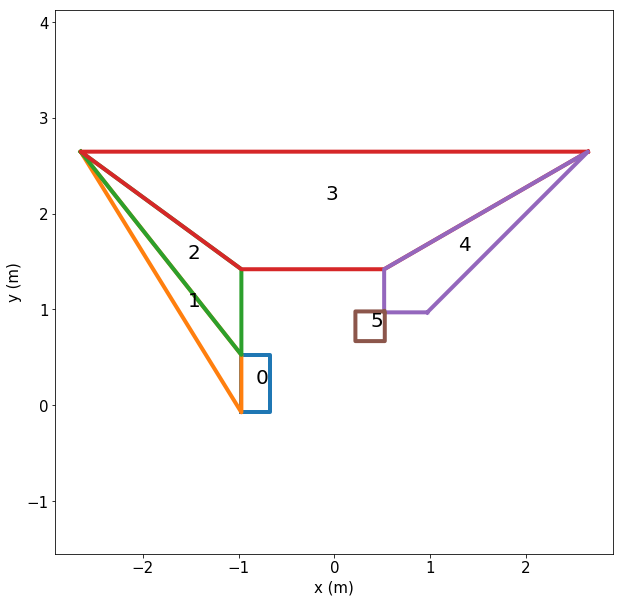

INITIALIZED ShapeBoat 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.002466 seconds
ADDING COSTS
Number of costs 2
0.002029 seconds
ADDING CONSTRAINTS
None
Number of constraints 570
0.127087 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.463097 seconds



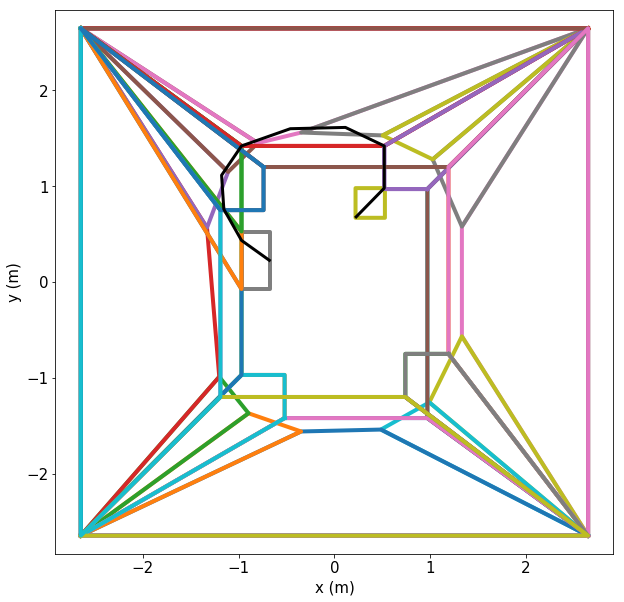

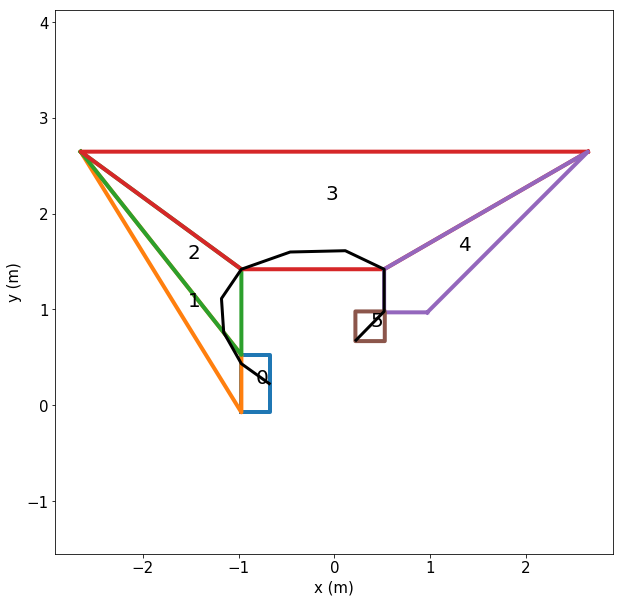

SETTING ENDPOINTS
Calculated C-Space: 0.222111 seconds
Set up graph: 0.117806 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (-0.6796875 0.453125) 0.0
found path endpoint hulls 23 24


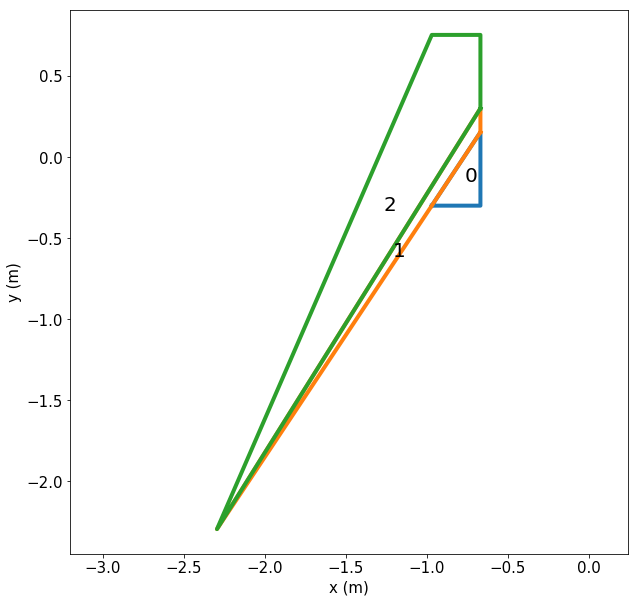

INITIALIZED ShapeBoat 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 136
0.002374 seconds
ADDING COSTS
Number of costs 2
0.001248 seconds
ADDING CONSTRAINTS
None
Number of constraints 256
0.050754 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.203181 seconds



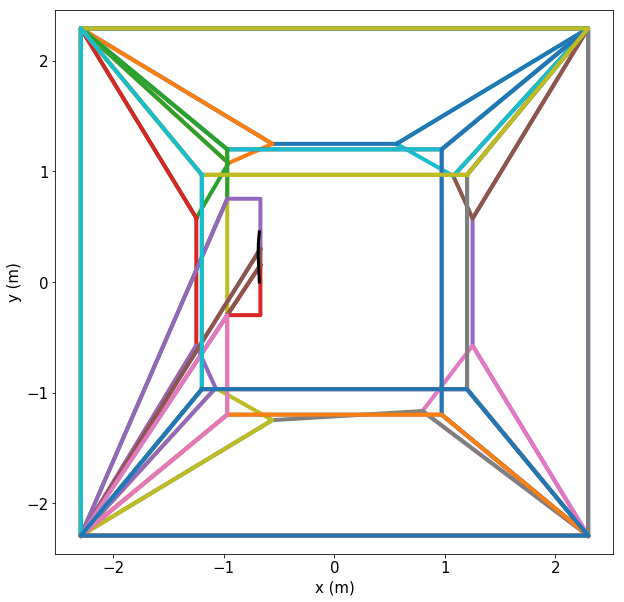

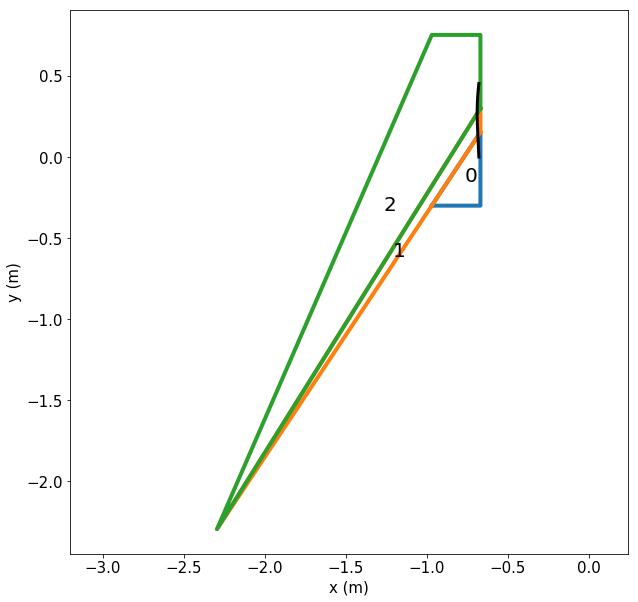

SETTING ENDPOINTS
Calculated C-Space: 0.273293 seconds
Set up graph: 0.179239 seconds
finding_vertex POINT (-0.453125 0.453125) 0.0
finding_vertex POINT (-0.90625 -0.2265625) 270.0
found path endpoint hulls 28 32


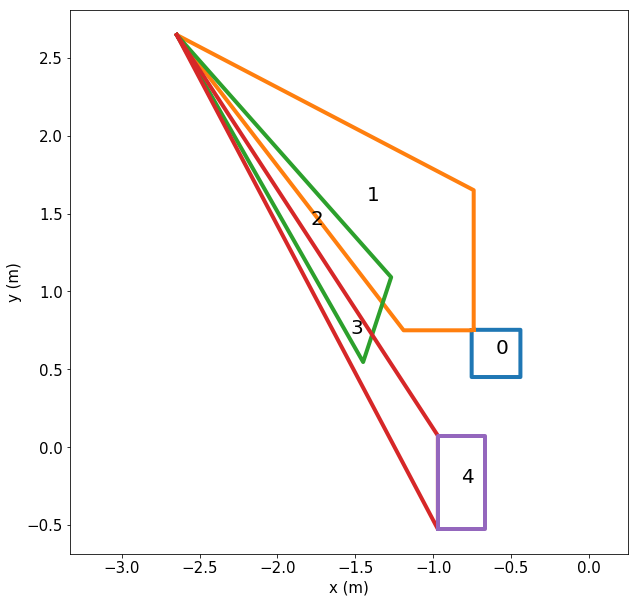

INITIALIZED ShapeBoat 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 156
0.002575 seconds
ADDING COSTS
Number of costs 2
0.001611 seconds
ADDING CONSTRAINTS
None
Number of constraints 472
0.081262 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.438312 seconds



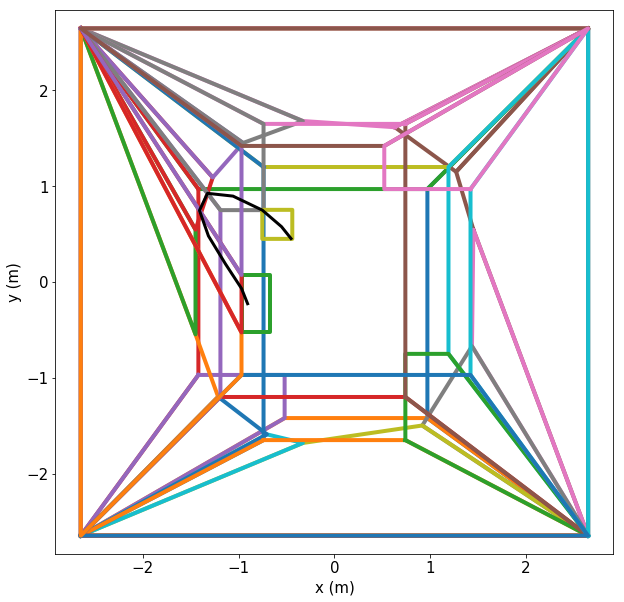

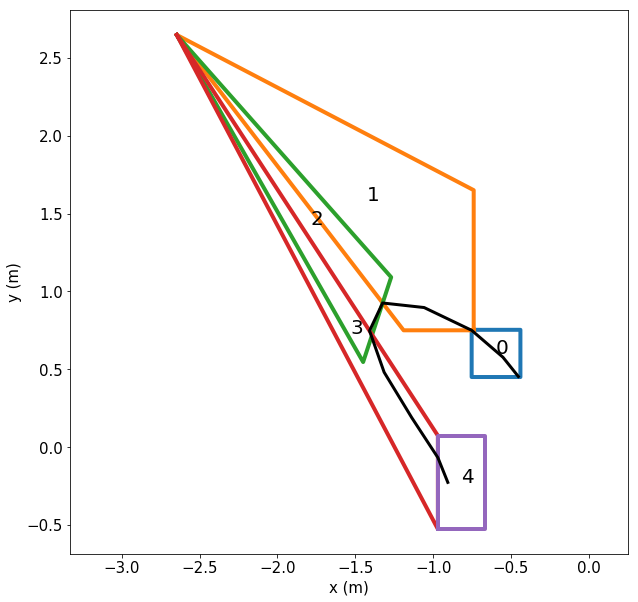

SETTING ENDPOINTS
Calculated C-Space: 0.281389 seconds
Set up graph: 0.125131 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (0 0.6796875) 90.0
found path endpoint hulls 26 4


INITIALIZED ShapeBoat 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.003579 seconds
ADDING COSTS
Number of costs 2
0.001296 seconds
ADDING CONSTRAINTS
None
Number of constraints 510
0.081847 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.362111 seconds



SETTING ENDPOINTS
Calculated C-Space: 0.246410 seconds
Set up graph: 0.132659 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (-0.2265625 0.90625) 0.0
found path endpoint hulls 23 26


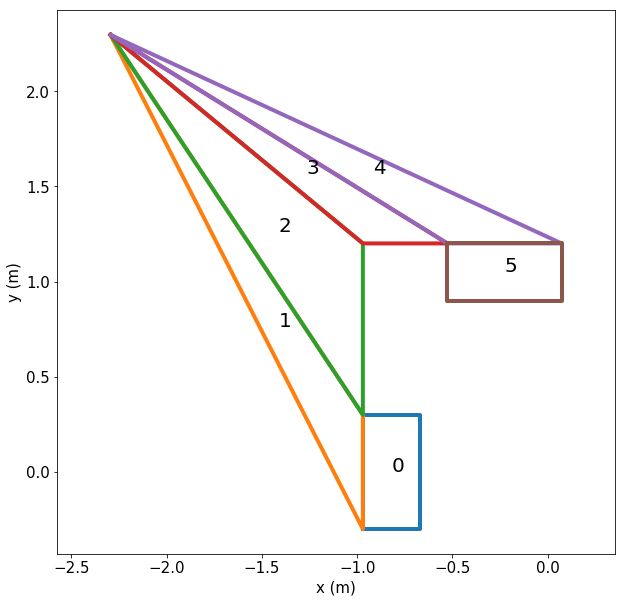

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.002715 seconds
ADDING COSTS
Number of costs 12
0.008372 seconds
ADDING CONSTRAINTS
None
Number of constraints 850
0.199991 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.530862 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.330497 seconds
Set up graph: 0.157428 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (-0.2265625 0.90625) 0.0
found path endpoint hulls 23 26


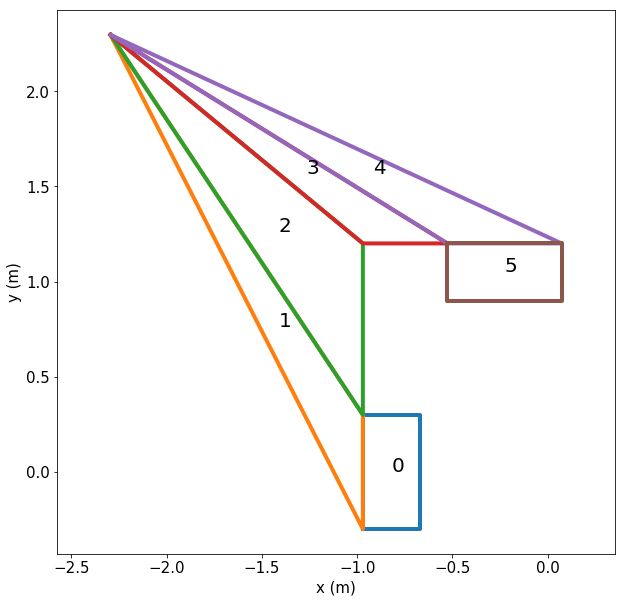

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 106
0.004138 seconds
ADDING COSTS
Number of costs 11
0.010230 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 28
0.038785 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.046585 seconds

Time Scaling target: 1.000000, result: 1.000000
Time Scaling target: 5.419871, result: 5.600000


SETTING ENDPOINTS
Calculated C-Space: 0.306874 seconds
Set up graph: 0.249846 seconds
finding_vertex POINT (-0.6796875 0.453125) 0.0
finding_vertex POINT (0 1.359375) 0.0
found path endpoint hulls 26 29


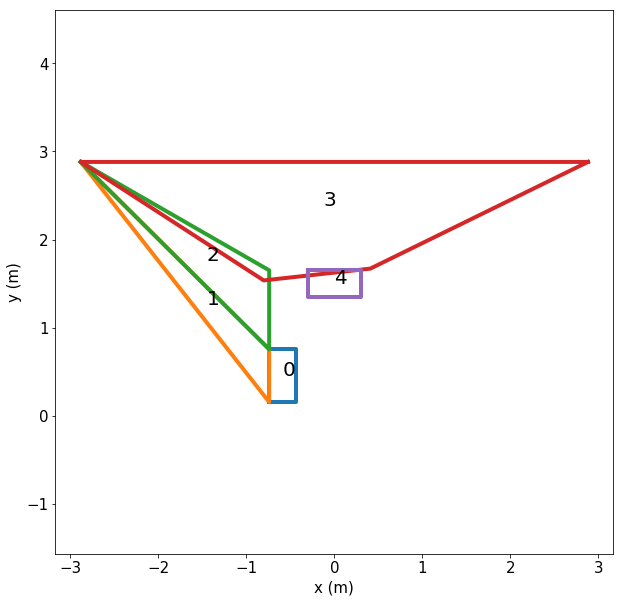

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 156
0.002865 seconds
ADDING COSTS
Number of costs 12
0.013449 seconds
ADDING CONSTRAINTS
None
Number of constraints 756
0.194877 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.598298 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.236971 seconds
Set up graph: 0.224328 seconds
finding_vertex POINT (-0.6796875 0.453125) 0.0
finding_vertex POINT (0 1.359375) 0.0
found path endpoint hulls 26 29


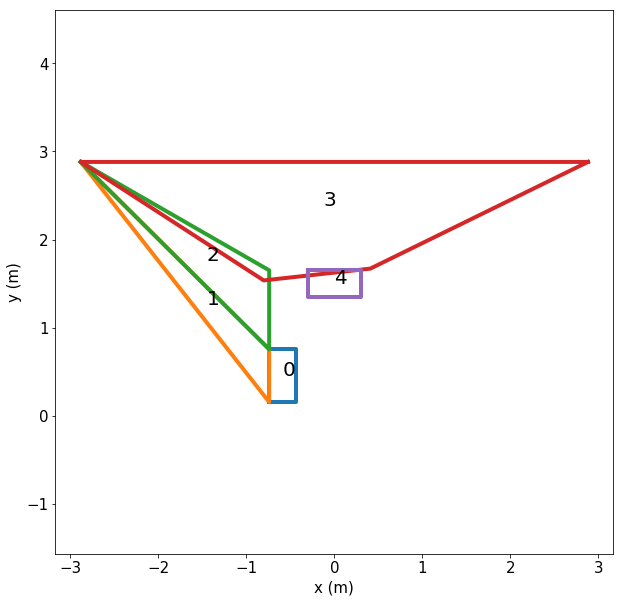

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 106
0.005397 seconds
ADDING COSTS
Number of costs 11
0.009390 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 34
0.046867 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.038694 seconds

Time Scaling target: 1.000000, result: 1.000000
Time Scaling target: 3.678144, result: 3.800000


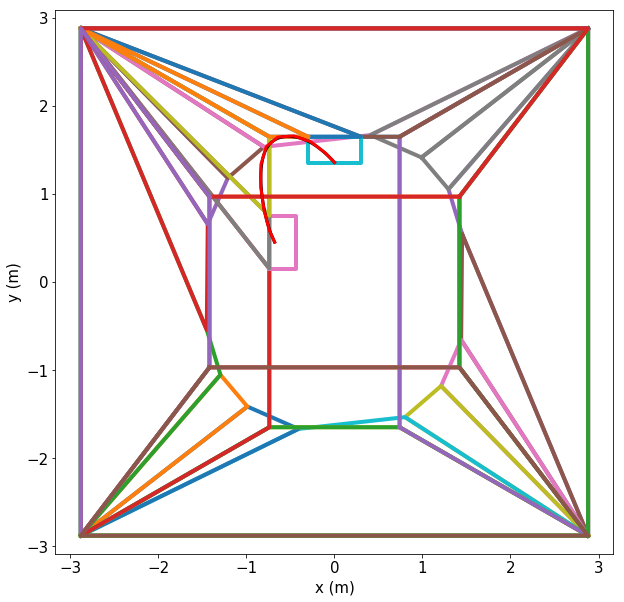

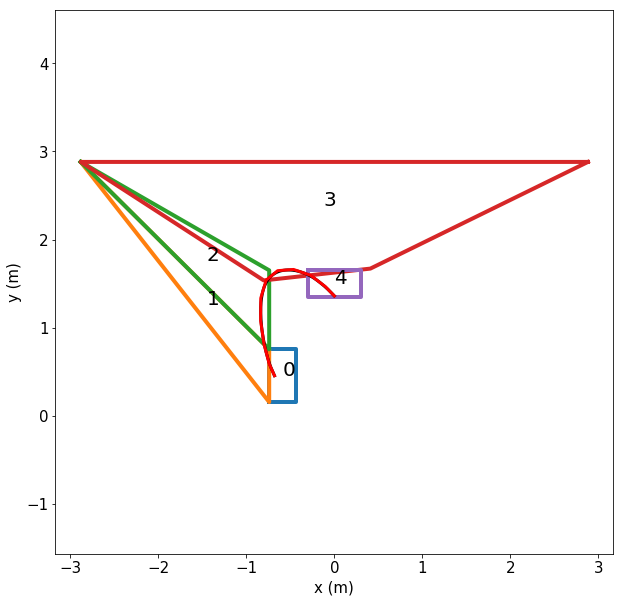

SETTING ENDPOINTS
Calculated C-Space: 0.177312 seconds
Set up graph: 0.279257 seconds
finding_vertex POINT (-0.6796875 0.2265625) 0.0
finding_vertex POINT (0.2265625 0.6796875) 0.0
found path endpoint hulls 27 28


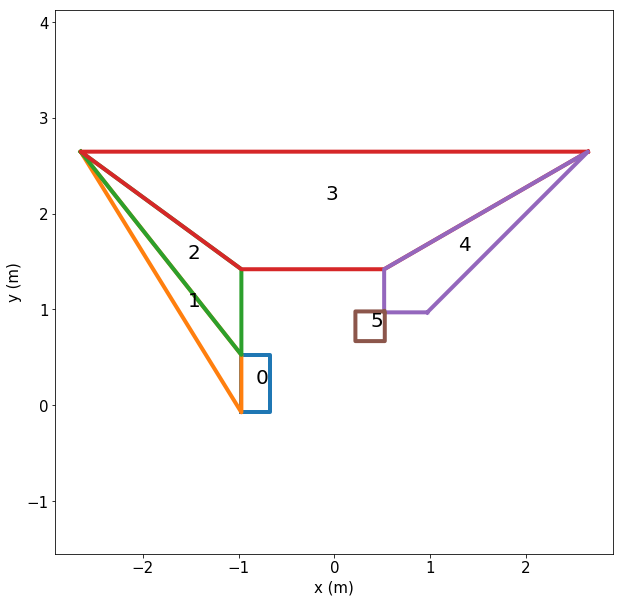

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.003333 seconds
ADDING COSTS
Number of costs 12
0.010129 seconds
ADDING CONSTRAINTS
None
Number of constraints 1002
0.276024 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.324789 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.177548 seconds
Set up graph: 0.164851 seconds
finding_vertex POINT (-0.6796875 0.2265625) 0.0
finding_vertex POINT (0.2265625 0.6796875) 0.0
found path endpoint hulls 27 28


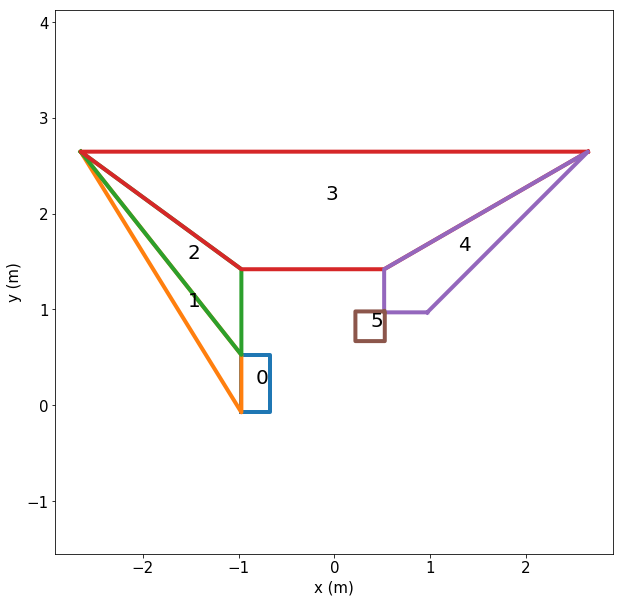

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 106
0.006818 seconds
ADDING COSTS
Number of costs 11
0.005975 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 52
0.061584 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.033665 seconds

Time Scaling target: 1.000000, result: 1.000000
Time Scaling target: 5.477226, result: 5.600000


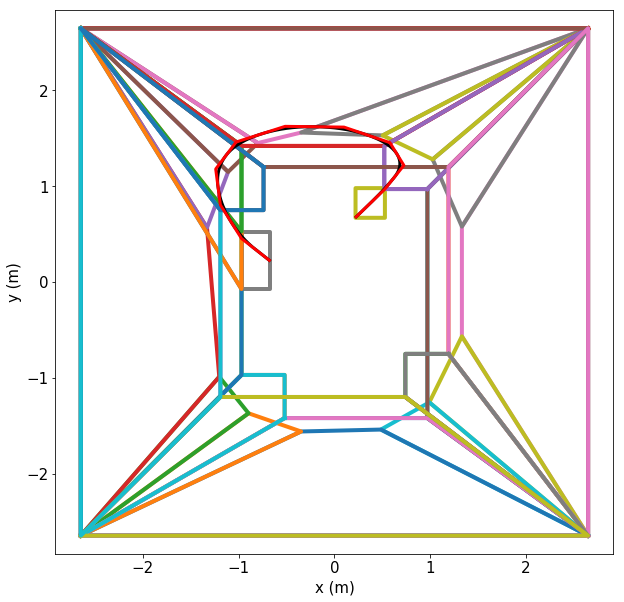

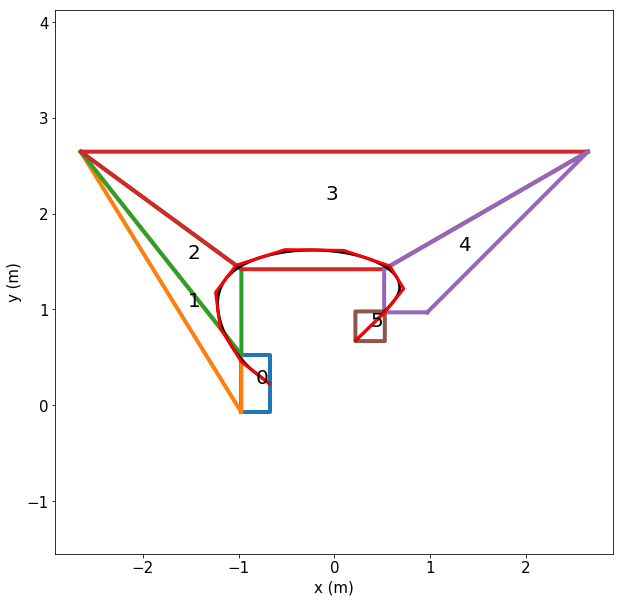

SETTING ENDPOINTS
Calculated C-Space: 0.277932 seconds
Set up graph: 0.114551 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (-0.6796875 0.453125) 0.0
found path endpoint hulls 23 24


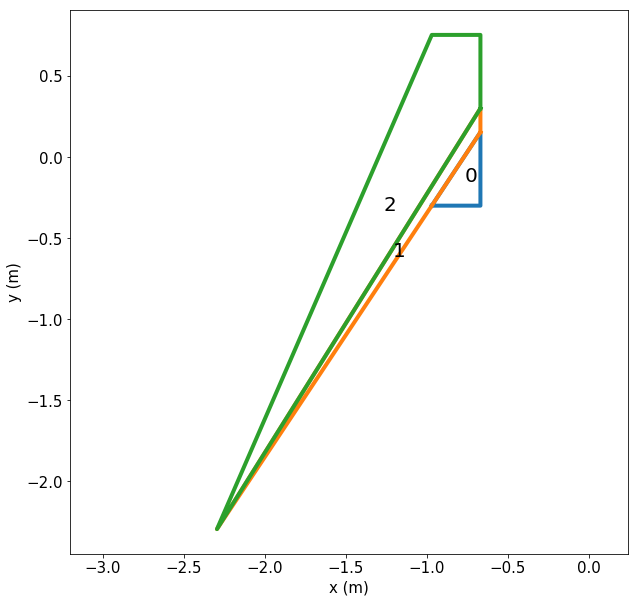

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 136
0.002096 seconds
ADDING COSTS
Number of costs 12
0.010649 seconds
ADDING CONSTRAINTS
None
Number of constraints 454
0.113287 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.234786 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.305658 seconds
Set up graph: 0.139309 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (-0.6796875 0.453125) 0.0
found path endpoint hulls 23 24


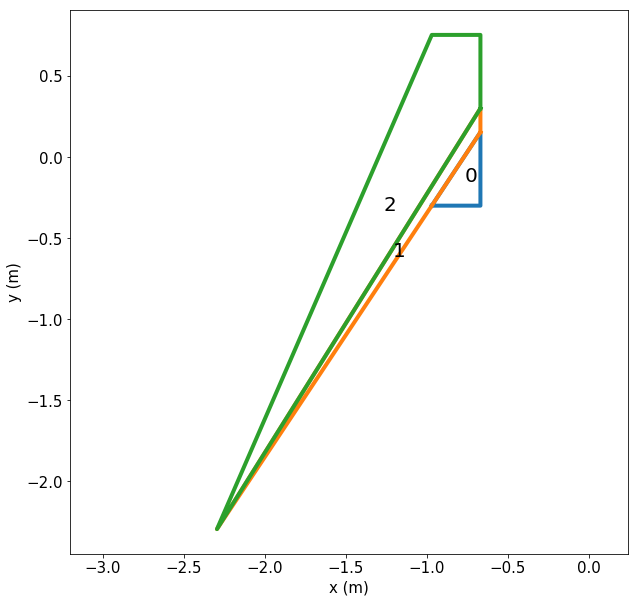

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 106
0.003313 seconds
ADDING COSTS
Number of costs 11
0.009044 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 40
0.026994 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.042616 seconds

Time Scaling target: 1.000000, result: 1.000000
Time Scaling target: 1.550292, result: 1.600000


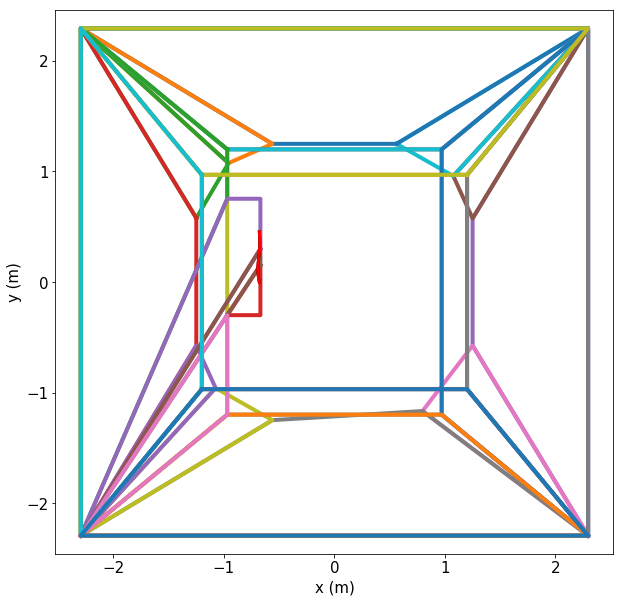

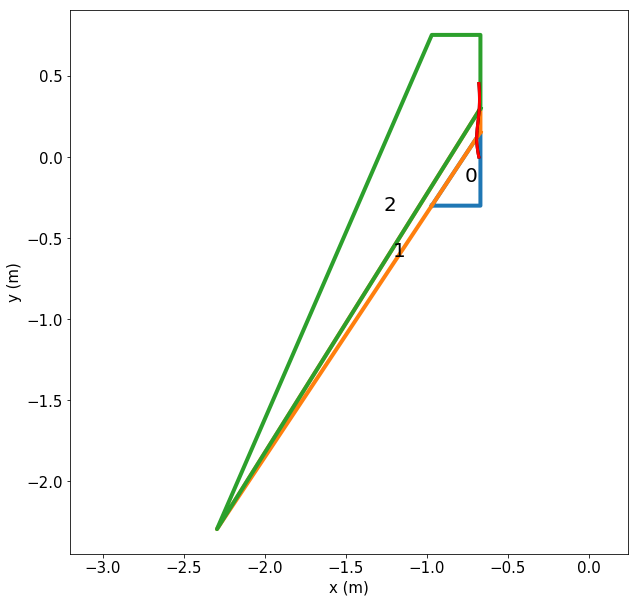

SETTING ENDPOINTS
Calculated C-Space: 0.227995 seconds
Set up graph: 0.218040 seconds
finding_vertex POINT (-0.453125 0.453125) 0.0
finding_vertex POINT (-0.90625 -0.2265625) 270.0
found path endpoint hulls 28 32


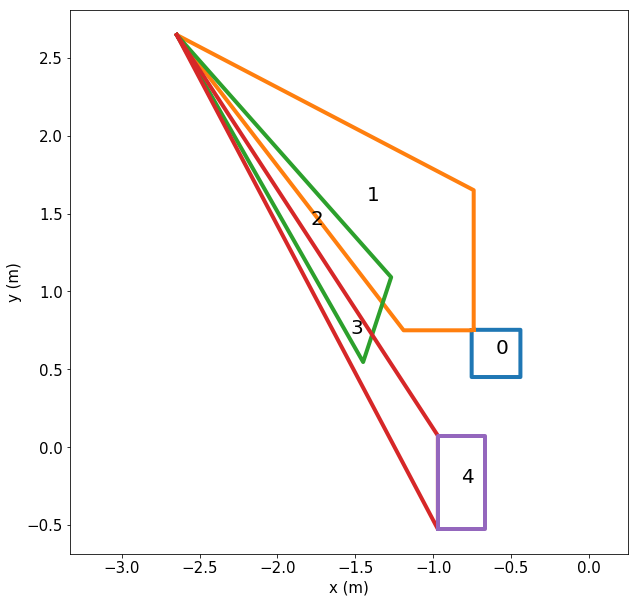

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 156
0.002191 seconds
ADDING COSTS
Number of costs 12
0.005443 seconds
ADDING CONSTRAINTS
None
Number of constraints 832
0.144544 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.440499 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.208885 seconds
Set up graph: 0.188874 seconds
finding_vertex POINT (-0.453125 0.453125) 0.0
finding_vertex POINT (-0.90625 -0.2265625) 270.0
found path endpoint hulls 28 32


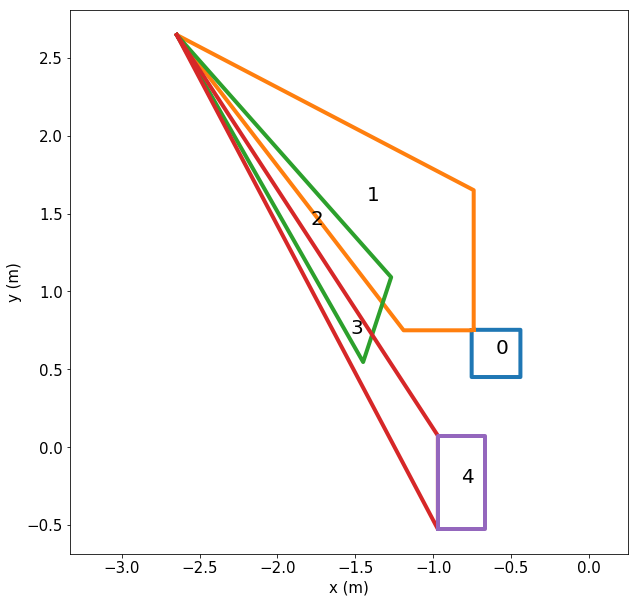

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 106
0.003796 seconds
ADDING COSTS
Number of costs 11
0.006327 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 44
0.045166 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.056096 seconds

Time Scaling target: 1.000000, result: 1.000000
Time Scaling target: 4.075291, result: 4.200000


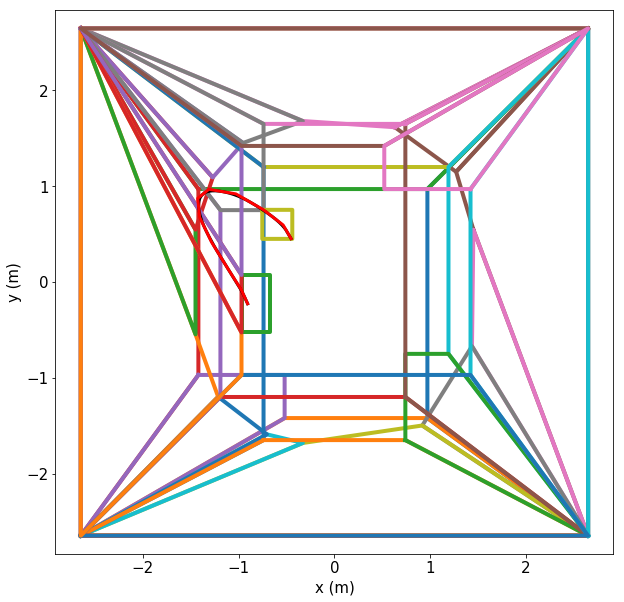

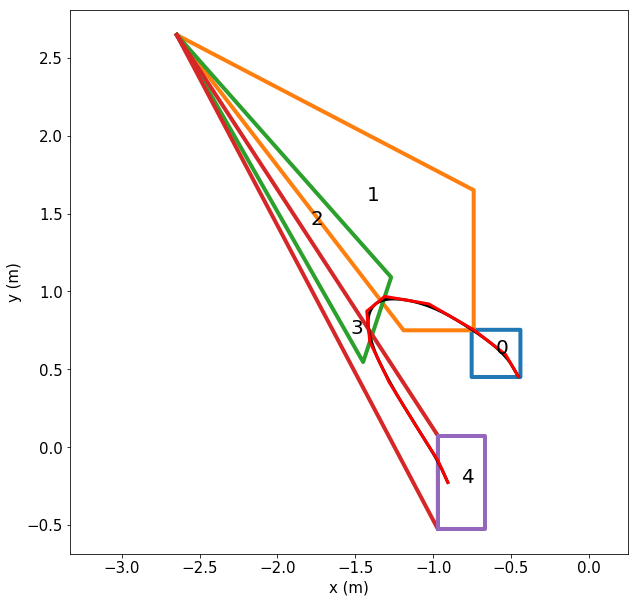

SETTING ENDPOINTS
Calculated C-Space: 0.218953 seconds
Set up graph: 0.280458 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (0 0.6796875) 90.0
found path endpoint hulls 26 4


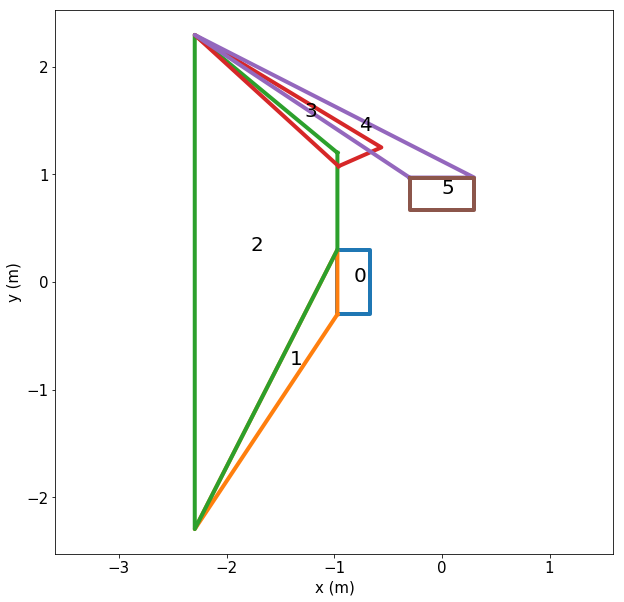

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.007963 seconds
ADDING COSTS
Number of costs 12
0.010552 seconds
ADDING CONSTRAINTS
None
Number of constraints 888
0.273391 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.873475 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.200501 seconds
Set up graph: 0.153622 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (0 0.6796875) 90.0
found path endpoint hulls 26 4


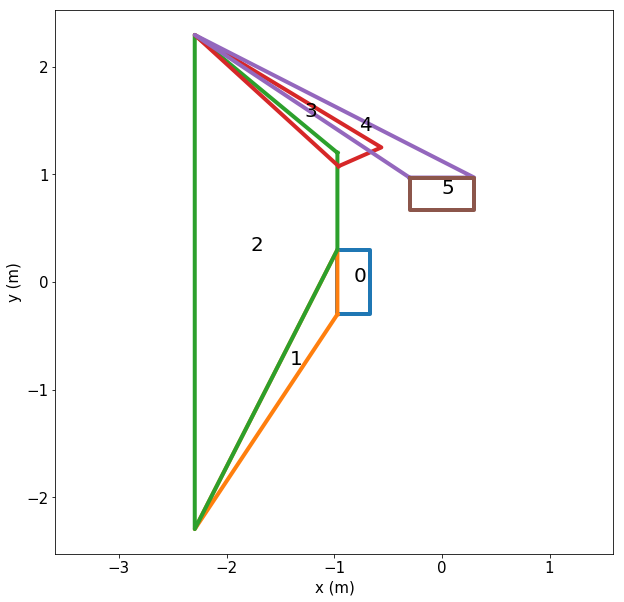

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 106
0.003761 seconds
ADDING COSTS
Number of costs 11
0.005141 seconds
ADDING CONSTRAINTS
[2, 5]
Number of constraints 30
0.031240 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: SNOPT
0.037528 seconds

Time Scaling target: 1.000000, result: 1.000000
Time Scaling target: 5.388066, result: 5.400000


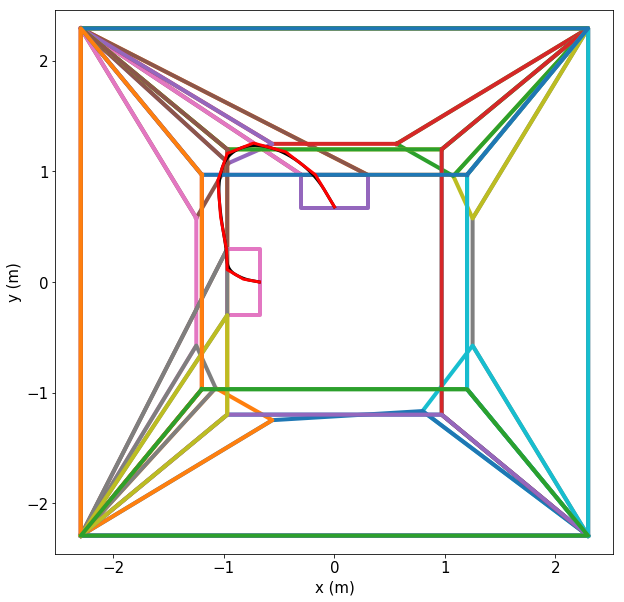

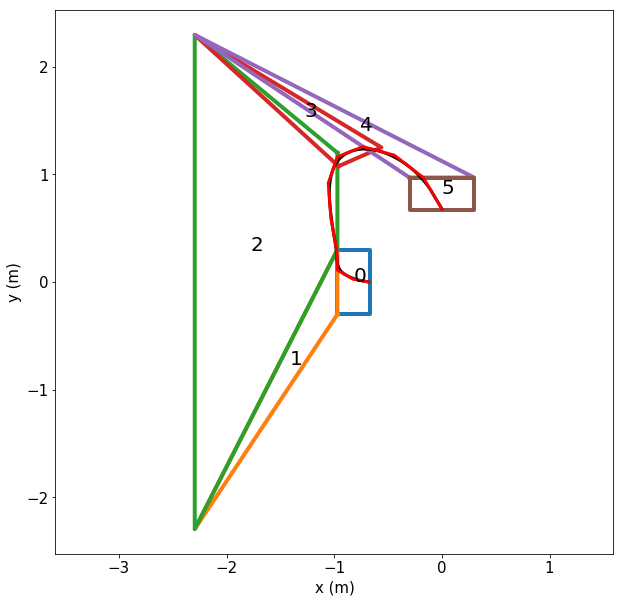

SETTING ENDPOINTS
Calculated C-Space: 0.270326 seconds
Set up graph: 0.124936 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (-0.2265625 0.90625) 0.0
found path endpoint hulls 23 26


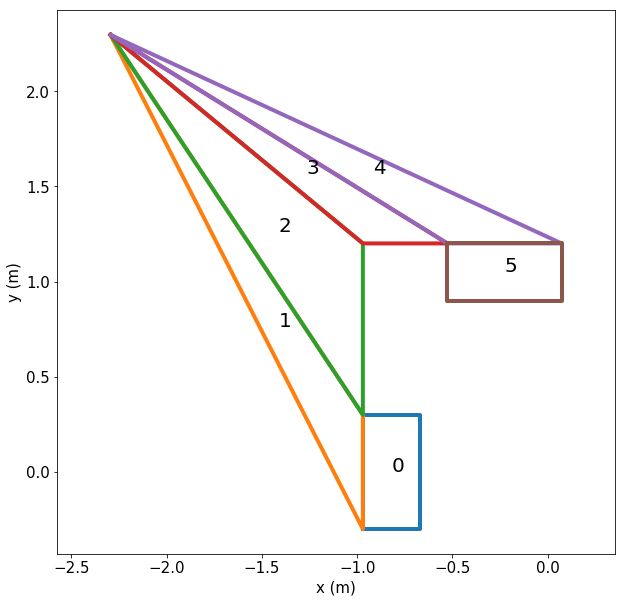

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.009105 seconds
ADDING COSTS
Number of costs 12
0.013376 seconds
ADDING CONSTRAINTS
None
Number of constraints 850
0.222431 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.654980 seconds

Time Scaling target: 1.000000, result: 1.000000
Time Scaling target: 5.419871, result: 5.600000


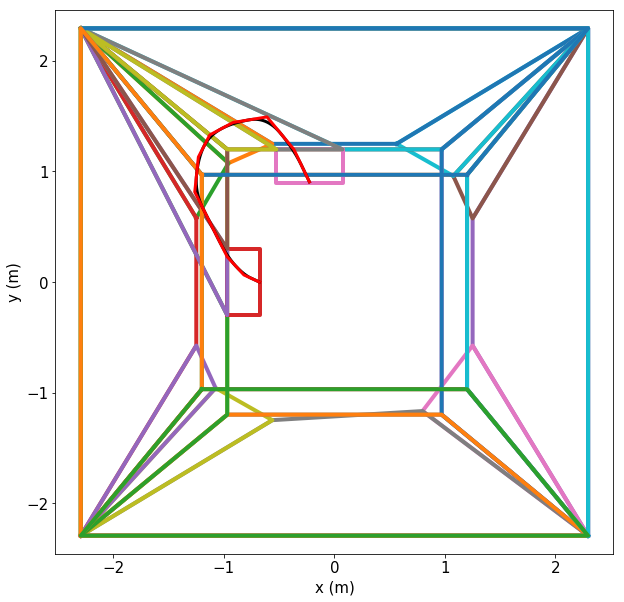

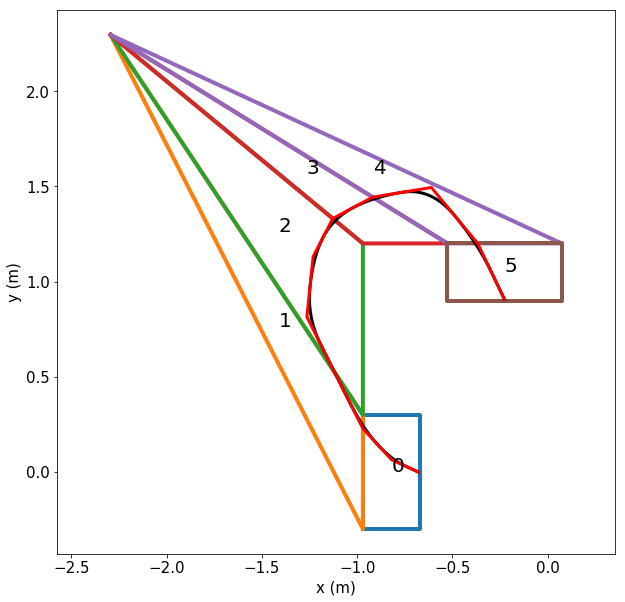

SETTING ENDPOINTS
Calculated C-Space: 0.241588 seconds
Set up graph: 0.152658 seconds
finding_vertex POINT (-0.6796875 0.453125) 0.0
finding_vertex POINT (0 1.359375) 0.0
found path endpoint hulls 26 29


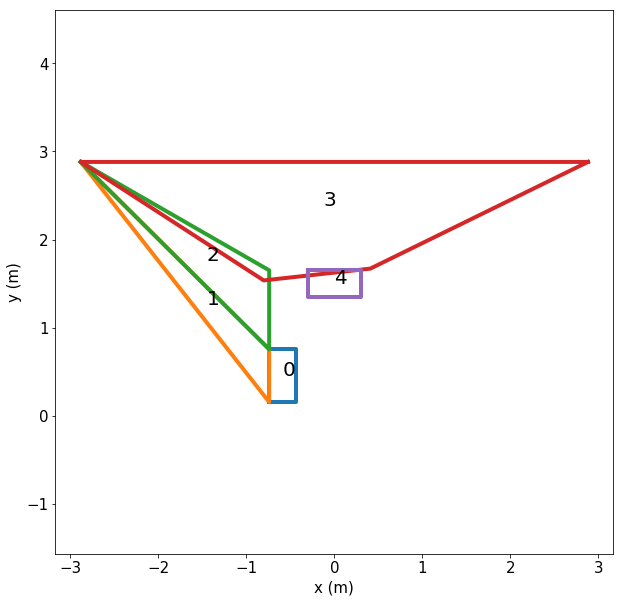

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 156
0.007661 seconds
ADDING COSTS
Number of costs 12
0.007609 seconds
ADDING CONSTRAINTS
None
Number of constraints 756
0.142325 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.537496 seconds

Time Scaling target: 1.000000, result: 1.000000
Time Scaling target: 3.467192, result: 3.600000


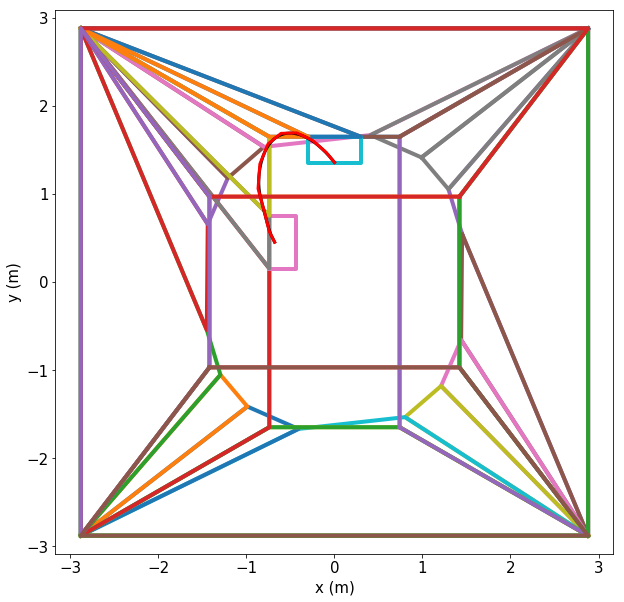

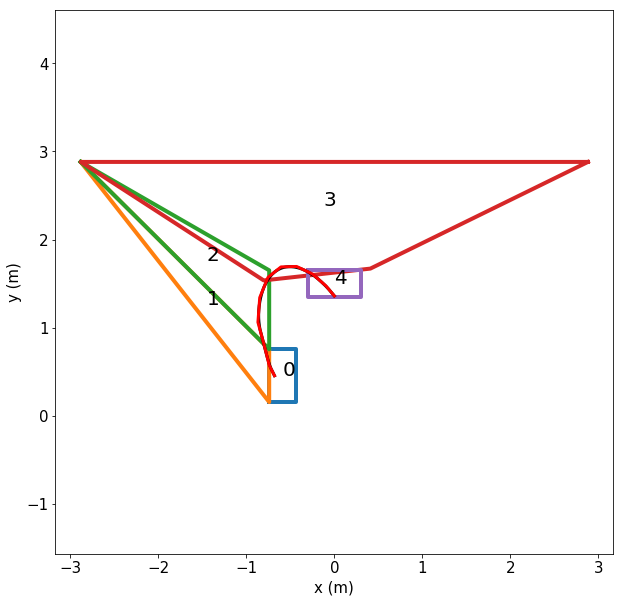

SETTING ENDPOINTS
Calculated C-Space: 0.190831 seconds
Set up graph: 0.190281 seconds
finding_vertex POINT (-0.6796875 0.2265625) 0.0
finding_vertex POINT (0.2265625 0.6796875) 0.0
found path endpoint hulls 27 28


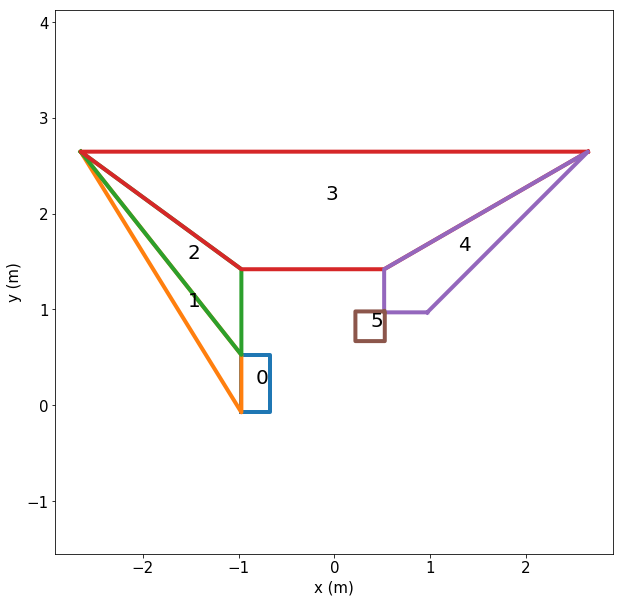

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.002243 seconds
ADDING COSTS
Number of costs 12
0.010890 seconds
ADDING CONSTRAINTS
None
Number of constraints 1002
0.162769 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.237279 seconds

Time Scaling target: 1.000000, result: 1.000000
Time Scaling target: 7.152486, result: 7.200000


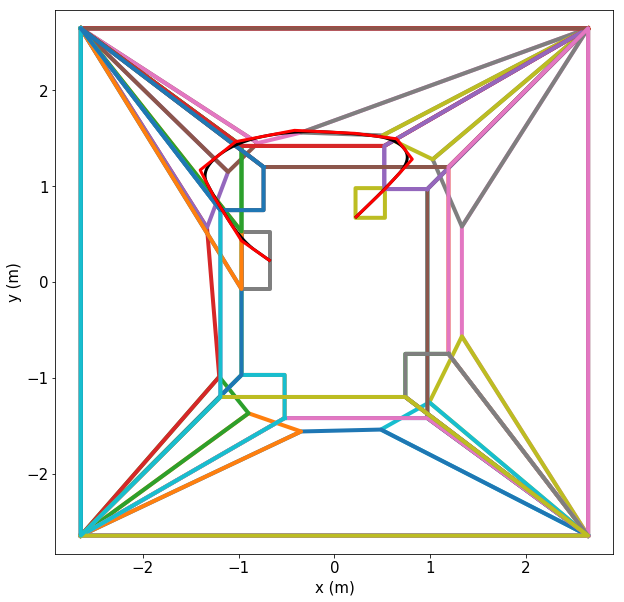

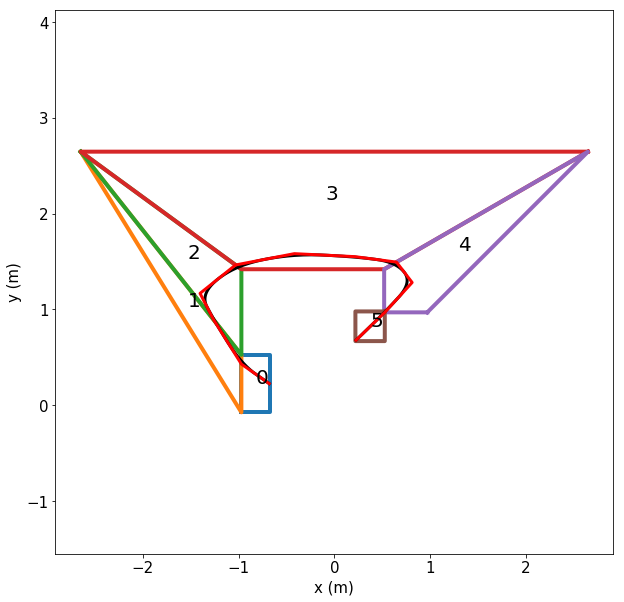

SETTING ENDPOINTS
Calculated C-Space: 0.304163 seconds
Set up graph: 0.121928 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (-0.6796875 0.453125) 0.0
found path endpoint hulls 23 24


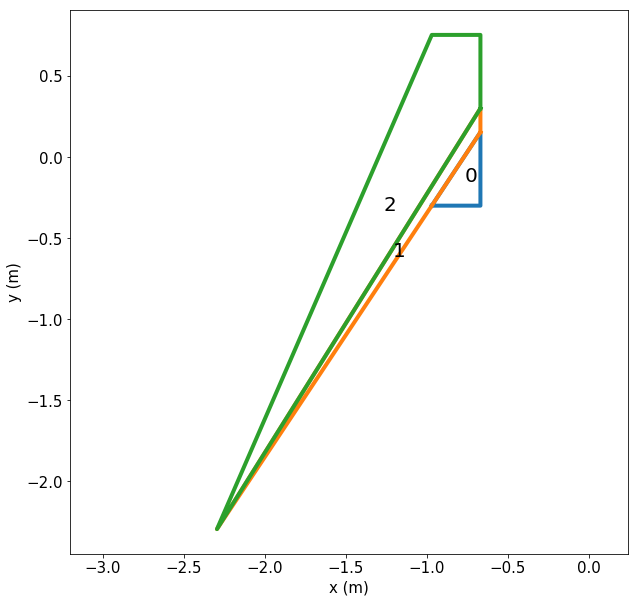

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 136
0.001822 seconds
ADDING COSTS
Number of costs 12
0.013320 seconds
ADDING CONSTRAINTS
None
Number of constraints 454
0.097742 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.324105 seconds

Time Scaling target: 1.000000, result: 1.000000
Time Scaling target: 1.580275, result: 1.600000


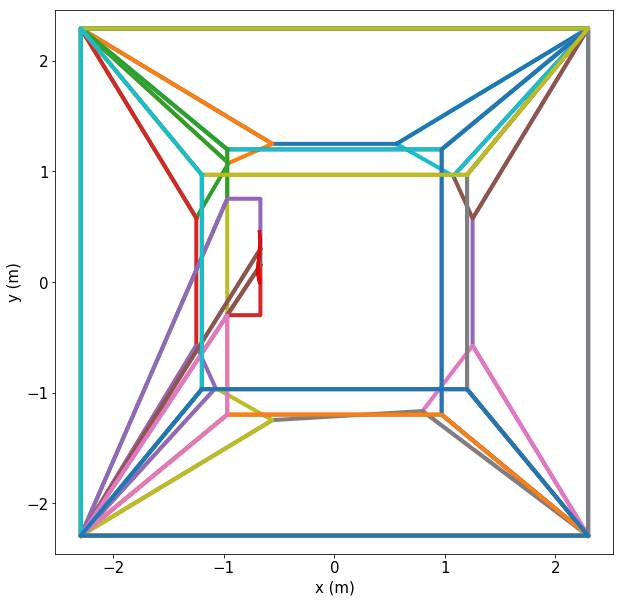

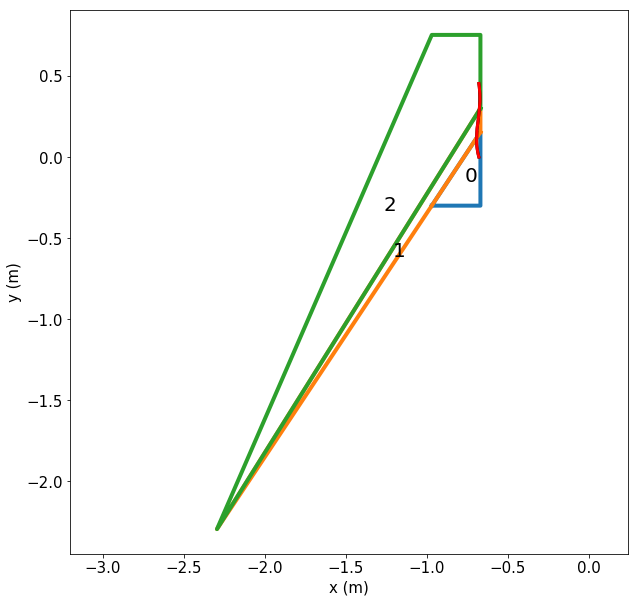

SETTING ENDPOINTS
Calculated C-Space: 0.283860 seconds
Set up graph: 0.289205 seconds
finding_vertex POINT (-0.453125 0.453125) 0.0
finding_vertex POINT (-0.90625 -0.2265625) 270.0
found path endpoint hulls 28 32


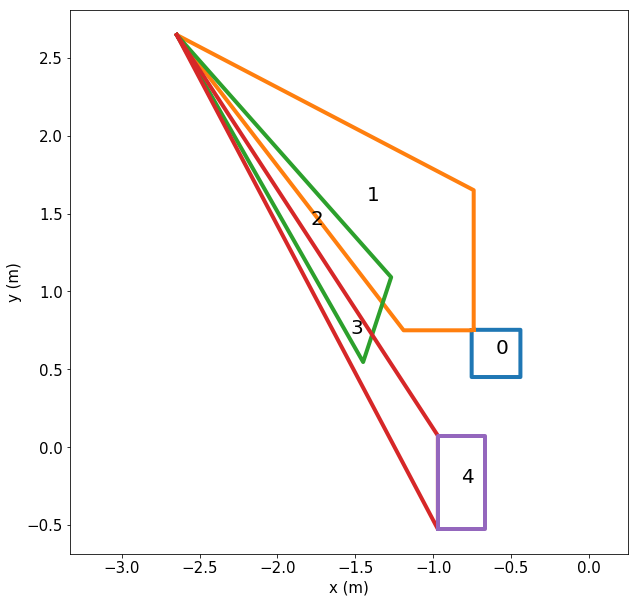

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 156
0.008654 seconds
ADDING COSTS
Number of costs 12
0.017815 seconds
ADDING CONSTRAINTS
None
Number of constraints 832
0.265020 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.576724 seconds

Time Scaling target: 1.000000, result: 1.000000
Time Scaling target: 4.592085, result: 4.600000


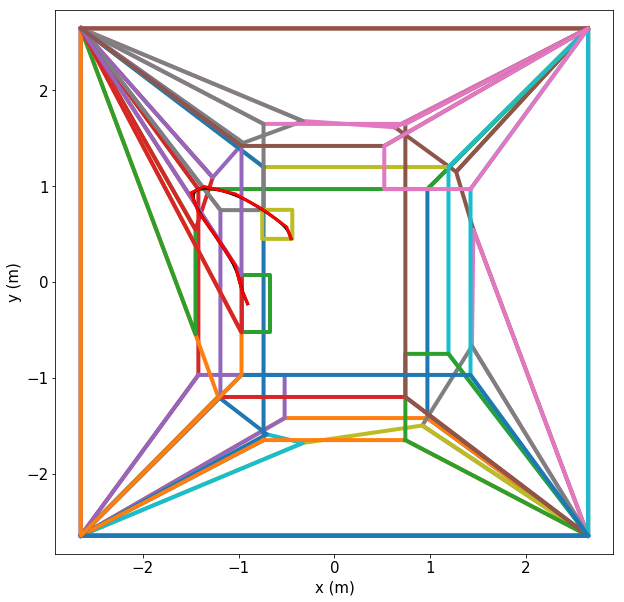

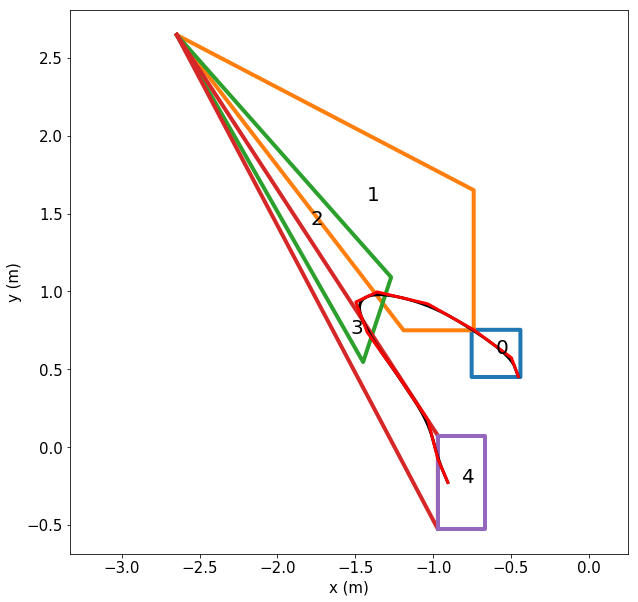

SETTING ENDPOINTS
Calculated C-Space: 0.274060 seconds
Set up graph: 0.240417 seconds
finding_vertex POINT (-0.6796875 0) 0.0
finding_vertex POINT (0 0.6796875) 90.0
found path endpoint hulls 26 4


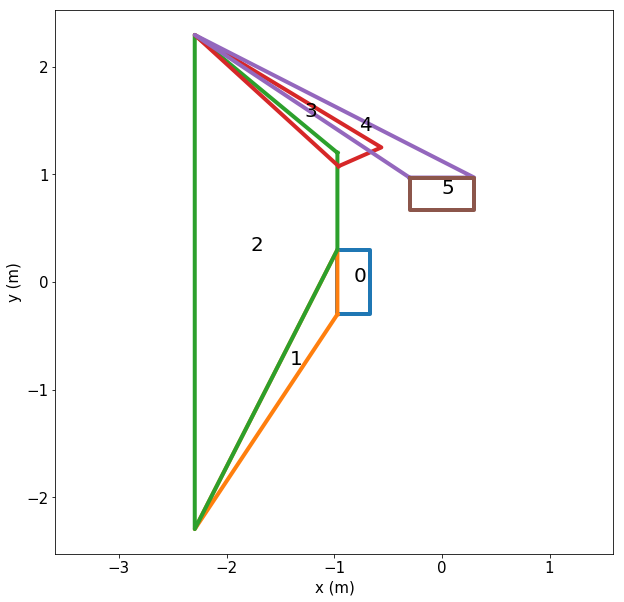

INITIALIZED ShapeBoat_spline 
boats_S:(1, 11, 6), boats_U:(1, 10, 4)
Number of decision vars 166
0.003337 seconds
ADDING COSTS
Number of costs 12
0.008918 seconds
ADDING CONSTRAINTS
None
Number of constraints 888
0.232304 seconds
PLANNING
SolutionResult.kSolutionFound
Solver: Mosek
0.962406 seconds

Time Scaling target: 1.000000, result: 1.000000
Time Scaling target: 5.388066, result: 5.400000


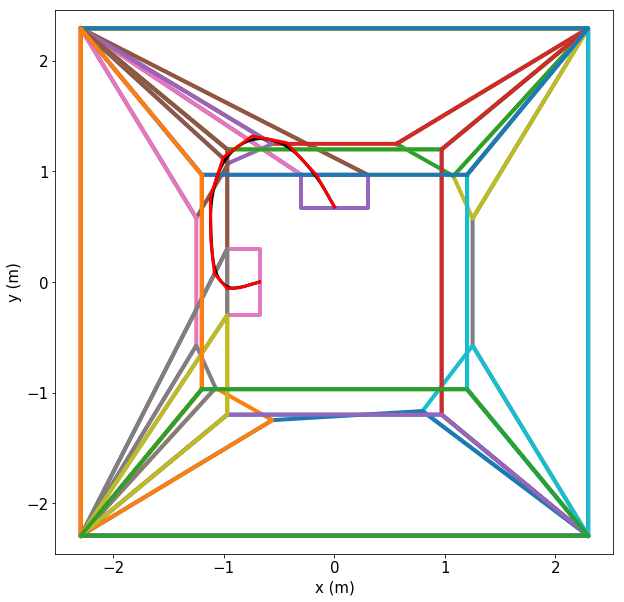

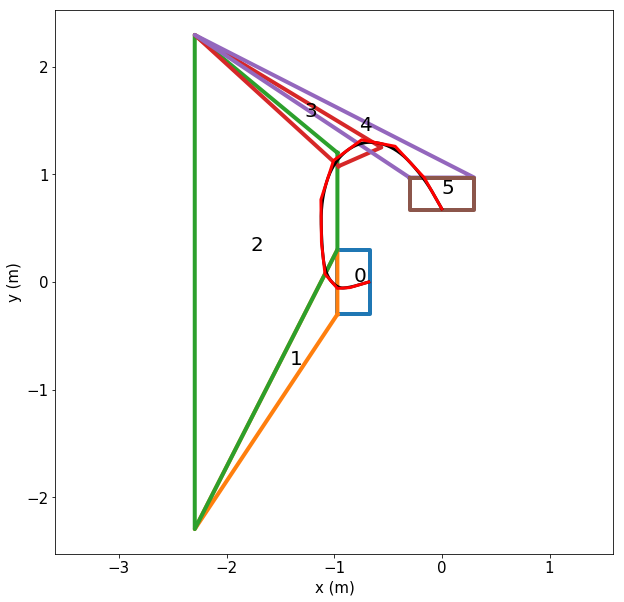

In [34]:
boats = {'line no-init':(None, ShapeBoat),
         'spline no-init':(None, ShapeBoat_spline),
         'spline init':(ShapeBoat_spline, ShapeBoat_spline)
        }

results = experiments(tests, boats)

In [23]:
table = print_results_tables(results)

line no-init
experiment           solve_time_init      solve_time_final    solve_time    pos_cost_avg    ang_cost_avg
-------------------  -----------------  ------------------  ------------  --------------  --------------
10_shinkyu2                                          0.222         0.222           4.052           9.744
11_shinkyu3-1                                        0.277         0.277           3.156           0.000
12_shinkyu3-2                                        0.289         0.289           1.313           0.000
1_line_to_L                                          0.286         0.286           1.541           0.000
2_T_to_block                                         0.204         0.204          12.226           0.000
3_line_to_block                                      0.259         0.259           4.535           0.000
4_line_to_L_2                                        0.381         0.381           1.955           9.744
5_U_to_block                              

TypeError: 'NoneType' object has no attribute '__getitem__'

In [11]:
#print in Banti Thesis Format
print_results_tables(results, latex=True)

line no-init
<type 'list'>
experiment             solve_time_init    solve_time_final    solve_time        pos_cost_avg    ang_cost_avg
---------------------  -----------------  ------------------  ----------------  --------------  --------------
& 10 shinkyu2          & -                & 0.140             & \textbf{0.141}  & 2.010         & 9.740 \\
& 11 shinkyu3-1        & -                & 0.140             & \textbf{0.135}  & 1.830         & 0.000 \\
& 12 shinkyu3-2        & -                & 0.110             & \textbf{0.105}  & 1.500         & 0.000 \\
& 1 line to L          & -                & 0.120             & \textbf{0.120}  & 1.010         & 0.000 \\
& 2 T to block         & -                & 0.130             & \textbf{0.132}  & 9.220         & 0.000 \\
& 3 line to block      & -                & 0.130             & \textbf{0.126}  & 3.270         & 0.000 \\
& 4 line to L 2        & -                & 0.120             & \textbf{0.120}  & 1.600         & 9.740 \\
& 5 

In [22]:
write_results(results, 'result_slow')

TypeError: 'NoneType' object has no attribute '__getitem__'